array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

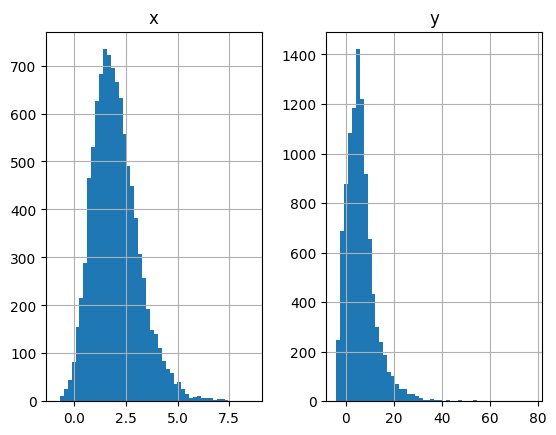

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

N = 10**4
normal = np.random.normal(size=(N,1))
gamma = np.random.gamma(shape=4,size=(N,1))
x = 0.5*normal+0.5*gamma
y = x**2+1+np.random.uniform(-5,5,(N,1))
df = pd.DataFrame(np.concatenate((x,y),axis = 1),columns=('x','y'))
df.hist(bins=50)

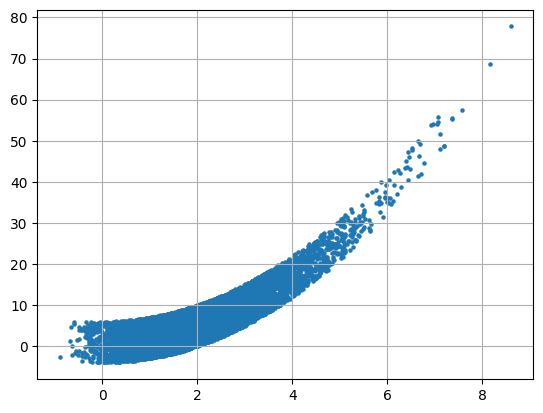

In [2]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [3]:
#@title Ancho constante
bins=6
M=df['x'].max()
m=df['x'].min()
intervalo=(M-m)/bins
intervalo

1.5824933648100012

In [4]:
m,m+intervalo # límites del primer contenedor

(-0.8942967502367236, 0.6881966145732776)

In [5]:
m+intervalo,m+2*intervalo # límites del secondo

(0.6881966145732776, 2.270689979383279)

In [6]:
# En general...
np.arange(m,M+intervalo,intervalo)

array([-0.89429675,  0.68819661,  2.27068998,  3.85318334,  5.43567671,
        7.01817007,  8.60066344])

In [7]:
limites=np.linspace(m,M,bins+1)
limites

array([-0.89429675,  0.68819661,  2.27068998,  3.85318334,  5.43567671,
        7.01817007,  8.60066344])

In [8]:
df['x_ancho']=pd.cut(df['x'],limites,include_lowest=True)
df.head()

,x,y,x_ancho
0,-0.357551,-0.185591,"(-0.895, 0.688]"
1,1.457878,2.840286,"(0.688, 2.271]"
2,2.497582,3.219976,"(2.271, 3.853]"
3,0.218563,5.733012,"(-0.895, 0.688]"
4,1.995112,9.550117,"(0.688, 2.271]"


In [9]:
x=df.groupby('x_ancho')['x'].mean()
x

x_ancho
(-0.895, 0.688]    0.323982
(0.688, 2.271]     1.512665
(2.271, 3.853]     2.881331
(3.853, 5.436]     4.394157
(5.436, 7.018]     6.038459
(7.018, 8.601]     7.406998
Name: x, dtype: float64

In [10]:
y=df.groupby('x_ancho')['y'].mean()
y

x_ancho
(-0.895, 0.688]     1.081540
(0.688, 2.271]      3.512027
(2.271, 3.853]      9.361267
(3.853, 5.436]     20.310702
(5.436, 7.018]     37.976185
(7.018, 8.601]     56.392733
Name: y, dtype: float64

In [30]:
lin_ancho=LinearRegression()
lin_ancho.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [29]:
lin=LinearRegression()
lin.fit(df[['x']],df['y'])
predict_SD=lin.predict(df[['x']])

C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


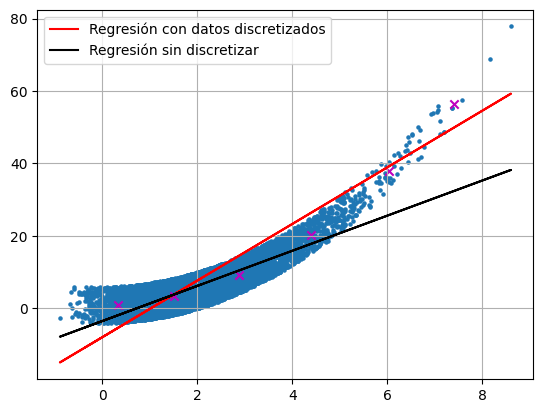

In [31]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Regresión con datos discretizados')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar')
plt.scatter(x.values,y.values,marker='x',c='m')
plt.legend()
plt.grid()

In [33]:
df.x_ancho.value_counts()

x_ancho
(0.688, 2.271]     5433
(2.271, 3.853]     2980
(-0.895, 0.688]     947
(3.853, 5.436]      568
(5.436, 7.018]       60
(7.018, 8.601]       12
Name: count, dtype: int64

In [34]:
bins = 6
n_quantile = df['x'].shape[0]/bins
n_quantile

1666.6666666666667

In [35]:
pd.qcut?


In [36]:
df['x_freq'],limites_F=pd.qcut(df['x'],bins,retbins=True)
limites_F

array([-0.89429675,  0.95675231,  1.43459905,  1.87543634,  2.36562683,
        3.0291197 ,  8.60066344])

In [37]:
df['x_freq'].value_counts()

x_freq
(-0.895, 0.957]    1667
(0.957, 1.435]     1667
(1.875, 2.366]     1667
(3.029, 8.601]     1667
(1.435, 1.875]     1666
(2.366, 3.029]     1666
Name: count, dtype: int64

In [38]:
x_F=df.groupby('x_freq')['x'].mean()
x_F

x_freq
(-0.895, 0.957]    0.538953
(0.957, 1.435]     1.206861
(1.435, 1.875]     1.654125
(1.875, 2.366]     2.114204
(2.366, 3.029]     2.673443
(3.029, 8.601]     3.847740
Name: x, dtype: float64

In [39]:
y_F=df.groupby('x_freq')['y'].mean()
y_F

x_freq
(-0.895, 0.957]     1.310571
(0.957, 1.435]      2.474912
(1.435, 1.875]      3.766131
(1.875, 2.366]      5.596477
(2.366, 3.029]      8.043857
(3.029, 8.601]     16.303677
Name: y, dtype: float64

In [43]:
lin_freq=LinearRegression()
lin_freq.fit(x_F.values.reshape(-1,1),y_F)
predict_freq=lin_freq.predict(df[['x']])

C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


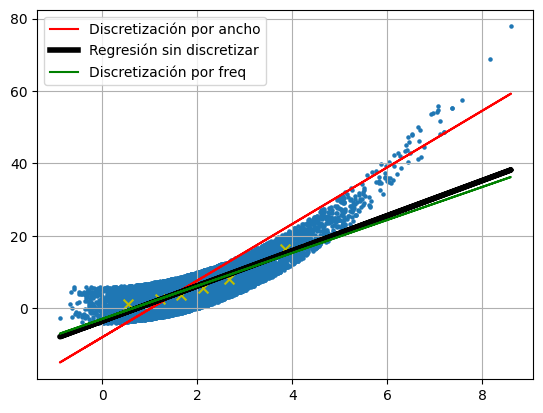

In [44]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Discretización por ancho')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar',lw=4)
plt.scatter(x_F.values,y_F.values,marker='x',c='y',s=50)

plt.plot(df['x'],predict_freq,'g',label='Discretización por freq')
plt.legend()
plt.grid()

<Axes: >

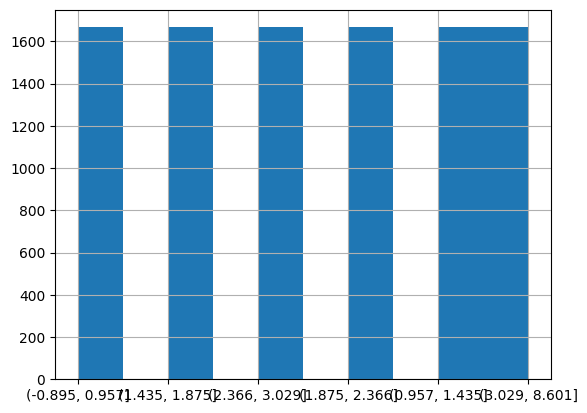

In [51]:
df['x_freq'].astype('string').hist()

<Axes: >

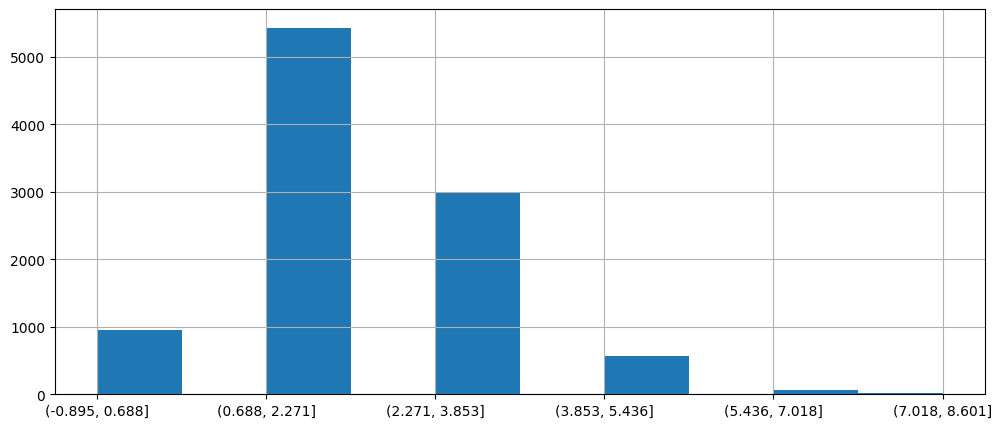

In [54]:
df.x_ancho.astype('string').hist(figsize=(12,5))